<a href="https://colab.research.google.com/github/VHDRKL/1031/blob/main/ch04_rnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
#unlix
!unzip abc.zip
#!rm TY*.csv

Archive:  abc.zip
  inflating: TY_climate_2015_2018.csv  


In [ ]:
f=open('TY_climate_2015_2018.csv', encoding = 'cp950')
data=f.read()
f.close()

lines=data.split('\n')
len(lines)  #196857
len(lines[0]) #98
len(lines[1]) #109
len(lines[196856])#113
header=lines[0].split(',')
del lines[0]  #←刪除項目名稱
len(lines) #196856
len(header) #20

raw_data=[]
for i, line in enumerate(lines):
  value=float( line.split(',')[8] )
  raw_data.append([value])

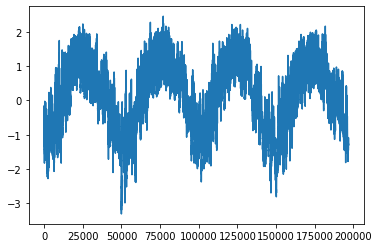

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mean = raw_data[:100000].mean()
raw_data -= mean
std=raw_data[:100000].std()
raw_data /= std
plt.plot(raw_data)


In [ ]:
delay = 72  #←要取未來的第72筆資料 (6*12)
data = raw_data[:-(delay-1)]   #←使用容器切片的技巧截掉後71筆資料, 作為訓練資料
target = raw_data[(delay-1):]   #←截掉前71筆資料, 作為目標資料
data.shape, target.shape

((196785, 1), (196785, 1))

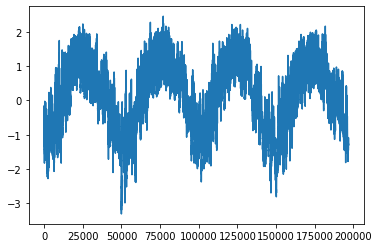

In [ ]:
import numpy as np
import matplotlib.pyplot as plt





delay = 72  #←要取未來的第72筆資料 (6*12)
data = raw_data[:-(delay-1)]   #←使用容器切片的技巧截掉後71筆資料, 作為訓練資料
target = raw_data[(delay-1):]   #←截掉前71筆資料, 作為目標資料

raw_data=np.array(raw_data)
raw_data.shape  #(196856, 1)
plt.plot(raw_data)

In [ ]:
import tensorflow as tf



train_gen=tf.keras.preprocessing.sequence.TimeseriesGenerator(
    data,
    target,
    length=36,
    sampling_rate=3,
    stride=36,  
  start_index=0,
  end_index=100000,
  batch_size=32
)
val_gen=tf.keras.preprocessing.sequence.TimeseriesGenerator(
    data,
    target,
    length=36,
    sampling_rate=3,
    stride=36,  
  start_index=100001,
  end_index=130000,
  batch_size=32
)
test_gen=tf.keras.preprocessing.sequence.TimeseriesGenerator(
    data,
    target,
    length=36,
    sampling_rate=3,
    stride=36,  
  start_index=130001,
  end_index=None,
  batch_size=32
)


In [ ]:
print(train_gen[0][0].shape) #(32, 12, 1)   
print(train_gen[1][0].shape) #(32, 12, 1)


(32, 12, 1)
(32, 12, 1)


In [ ]:
model=tf.keras.models.Sequential()
f1=tf.keras.layers.Flatten(input_shape=(12,1)) 
f2=tf.keras.layers.Dense(10, activation='relu')
f3=tf.keras.layers.Dense(10, activation='relu')
f4=tf.keras.layers.Dense(1)
model.add(f1)
model.add(f2)
model.add(f3)
model.add(f4)
model.summary()

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history=model.fit(train_gen, validation_data=val_gen, epochs=100)

Epoch 1/100
87/87 [==============================] - 0s 3ms/step - loss: 2.8383 - mae: 1.5182 - val_loss: 1.4141 - val_mae: 1.0168
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: 0.9062 - mae: 0.7800 - val_loss: 0.5409 - val_mae: 0.5704
Epoch 3/100
87/87 [==============================] - 0s 2ms/step - loss: 0.4061 - mae: 0.4984 - val_loss: 0.3952 - val_mae: 0.4897
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: 0.3200 - mae: 0.4426 - val_loss: 0.3729 - val_mae: 0.4760
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: 0.2845 - mae: 0.4173 - val_loss: 0.3370 - val_mae: 0.4567
Epoch 6/100
87/87 [==============================] - 0s 2ms/step - loss: 0.2668 - mae: 0.4038 - val_loss: 0.3273 - val_mae: 0.4483
Epoch 7/100
87/87 [==============================] - 0s 2ms/step - loss: 0.2570 - mae: 0.3997 - val_loss: 0.3080 - val_mae: 0.4362
Epoch 8/100
87/87 [==============================] - 0s 2ms/step - loss: 0.2499 - m

In [ ]:
# %% 顯示平均溫度誤差
print('平均溫度誤差為:', 
      history.history['val_mae'][-1]*std) 
#平均溫度誤差為: 2.8286283016204834  no (data-mean)/std
#2.458349876511652  
#RNN 平均溫度誤差為: 2.9840936312531037
#LSTM 2.3964029919394694

平均溫度誤差為: 2.458349876511652


In [ ]:
model2=tf.keras.models.Sequential()

f2=tf.keras.layers.SimpleRNN(10, activation='relu', input_shape=(12,1))
f3=tf.keras.layers.Dense(10, activation='relu')
f4=tf.keras.layers.Dense(1)
model2.add(f2)
model2.add(f3)
model2.add(f4)
#model2.summary()

In [ ]:
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history=model2.fit(train_gen, validation_data=val_gen, epochs=100)

Epoch 1/100
87/87 [==============================] - 0s 5ms/step - loss: 1.0778 - mae: 0.7972 - val_loss: 0.7307 - val_mae: 0.6871
Epoch 2/100
87/87 [==============================] - 0s 3ms/step - loss: 0.7741 - mae: 0.7000 - val_loss: 0.6290 - val_mae: 0.6325
Epoch 3/100
87/87 [==============================] - 0s 3ms/step - loss: 0.6865 - mae: 0.6631 - val_loss: 0.5875 - val_mae: 0.6182
Epoch 4/100
87/87 [==============================] - 0s 3ms/step - loss: 0.6497 - mae: 0.6449 - val_loss: 0.5553 - val_mae: 0.6029
Epoch 5/100
87/87 [==============================] - 0s 3ms/step - loss: 0.6165 - mae: 0.6244 - val_loss: 0.5308 - val_mae: 0.5771
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 0.5886 - mae: 0.6089 - val_loss: 0.5000 - val_mae: 0.5655
Epoch 7/100
87/87 [==============================] - 0s 3ms/step - loss: 0.5396 - mae: 0.5820 - val_loss: 0.4163 - val_mae: 0.5213
Epoch 8/100
87/87 [==============================] - 0s 3ms/step - loss: 0.3991 - m

In [ ]:
# %% 顯示平均溫度誤差
print('平均溫度誤差為:', 
      history.history['val_mae'][-1]*std) 

平均溫度誤差為: 2.9840936312531037


In [ ]:
model3=tf.keras.models.Sequential()

f2=tf.keras.layers.LSTM(10, activation='relu', input_shape=(12,1))
f3=tf.keras.layers.Dense(10, activation='relu')
f4=tf.keras.layers.Dense(1)
model3.add(f2)
model3.add(f3)
model3.add(f4)
#model2.summary()

In [ ]:
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history=model3.fit(train_gen, validation_data=val_gen, epochs=100)

In [ ]:
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history=model.fit(train_gen, validation_data=val_gen, epochs=100)

In [ ]:
# %% 顯示平均溫度誤差
print('平均溫度誤差為:', 
      history.history['val_mae'][-1]*std) 

平均溫度誤差為: 2.3964029919394694
